# 학생별 과목별 점수 데이터

## 데이터 불러오기

In [2]:
import pandas as pd

dataset = pd.read_csv('./datasets/중2_AI진단평가_과목별점수.csv',index_col=0)

### 1. 데이터 핸들링

In [3]:
dataset.columns

Index(['응시기간', '시험명', '학년', ' 응시일자', '전체', '국어', '영어', '수학', '과학', '사회', '역사'], dtype='object')

In [8]:
dataset = dataset.rename(columns={' 응시일자': '응시일자'})

In [9]:
data = dataset[['국어', '영어', '수학', '과학', '사회', '역사']]
data

,국어,영어,수학,과학,사회,역사
0,68,93.0,71.0,NaN,53.0,53.0
1,18,0.0,9.0,NaN,23.0,NaN
2,29,36.0,NaN,NaN,NaN,NaN
3,75,72.0,76.0,NaN,38.0,15.0
4,29,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...
2811,63,63.0,63.0,NaN,63.0,NaN
2812,72,65.0,9.0,NaN,30.0,15.0
2813,79,100.0,57.0,NaN,38.0,38.0
2814,51,86.0,71.0,NaN,79.0,48.0


In [10]:
data['국어'].unique() # 국어에는 결측치X

array([ 68,  18,  29,  75,  93,  79,  43,  65,  54,  22,  36, 100,  61,
        50,  86,  51,  25,   0,  40,  11,  72,  47,  63,  58,  33,  44],
      dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_20740\1212481153.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['국어'])


<Axes: xlabel='국어', ylabel='Density'>

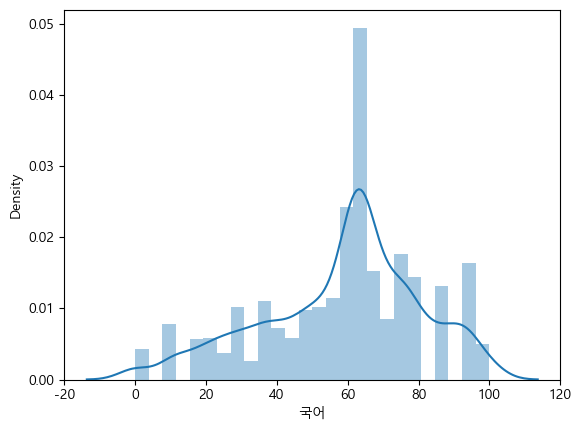

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.rc('font', family='Malgun Gothic') # 맑은 고딕으로 글꼴 설정하기
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 문제 해결하기

sns.distplot(data['국어'])

In [12]:
data = data.dropna() # 결측치 제거
data

,국어,영어,수학,과학,사회,역사
9,93,86.0,42.0,15.0,0.0,15.0
10,93,93.0,100.0,90.0,79.0,67.0
12,54,18.0,94.0,53.0,56.0,46.0
13,22,47.0,0.0,0.0,0.0,23.0
17,100,100.0,100.0,61.0,71.0,90.0
...,...,...,...,...,...,...
2211,93,86.0,37.0,53.0,71.0,46.0
2421,68,0.0,0.0,0.0,0.0,0.0
2696,100,47.0,46.0,15.0,38.0,30.0
2722,0,0.0,0.0,15.0,0.0,0.0


In [13]:
data['평균'] = (data['국어']+data['영어']+data['수학']+data['과학']+data['사회']+data['역사'])/6
data

C:\Users\user\AppData\Local\Temp\ipykernel_20740\3444630796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['평균'] = (data['국어']+data['영어']+data['수학']+data['과학']+data['사회']+data['역사'])/6


,국어,영어,수학,과학,사회,역사,평균
9,93,86.0,42.0,15.0,0.0,15.0,41.833333
10,93,93.0,100.0,90.0,79.0,67.0,87.000000
12,54,18.0,94.0,53.0,56.0,46.0,53.500000
13,22,47.0,0.0,0.0,0.0,23.0,15.333333
17,100,100.0,100.0,61.0,71.0,90.0,87.000000
...,...,...,...,...,...,...,...
2211,93,86.0,37.0,53.0,71.0,46.0,64.333333
2421,68,0.0,0.0,0.0,0.0,0.0,11.333333
2696,100,47.0,46.0,15.0,38.0,30.0,46.000000
2722,0,0.0,0.0,15.0,0.0,0.0,2.500000


C:\Users\user\AppData\Local\Temp\ipykernel_20740\3282495940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['평균'])


<Axes: xlabel='평균', ylabel='Density'>

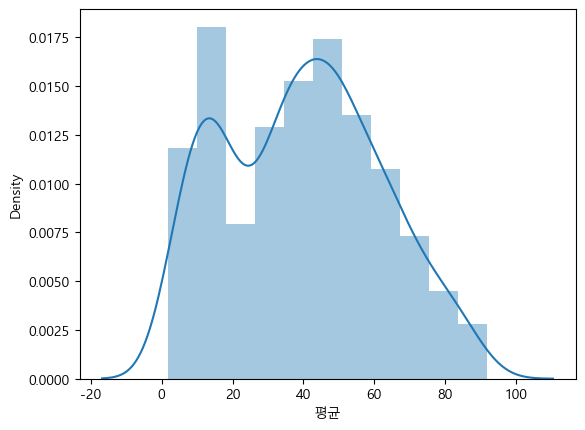

In [14]:
sns.distplot(data['평균'])

### 2. 초등 학생별 수준 군집화

In [15]:
input_data = data.copy()
input_data

,국어,영어,수학,과학,사회,역사,평균
9,93,86.0,42.0,15.0,0.0,15.0,41.833333
10,93,93.0,100.0,90.0,79.0,67.0,87.000000
12,54,18.0,94.0,53.0,56.0,46.0,53.500000
13,22,47.0,0.0,0.0,0.0,23.0,15.333333
17,100,100.0,100.0,61.0,71.0,90.0,87.000000
...,...,...,...,...,...,...,...
2211,93,86.0,37.0,53.0,71.0,46.0,64.333333
2421,68,0.0,0.0,0.0,0.0,0.0,11.333333
2696,100,47.0,46.0,15.0,38.0,30.0,46.000000
2722,0,0.0,0.0,15.0,0.0,0.0,2.500000


### 2-1. PCA 변환 수행

In [16]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components=2)

pca.fit(input_data)
score_pca = pca.transform(input_data)
print(score_pca.shape)

(569, 2)


In [17]:
print(pca.explained_variance_ratio_)

[0.62368626 0.11531527]


In [18]:
pca_columns=['pca_component_1','pca_component_2']
scoreDF_pca = pd.DataFrame(score_pca, columns=pca_columns)
scoreDF_pca

,pca_component_1,pca_component_2
0,-1.855632,69.433282
1,124.415486,18.382491
2,39.113259,-18.615283
3,-63.159409,1.631393
4,123.440818,30.251500
...,...,...
564,60.497581,29.777935
565,-80.336428,15.861448
566,9.419867,42.431642
567,-94.167144,-33.082715


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


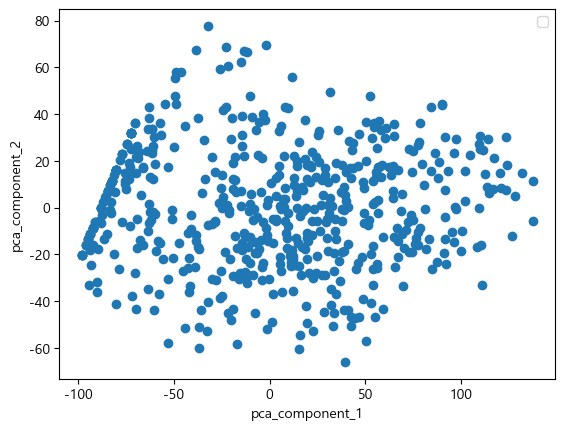

In [19]:
x_axis_data = scoreDF_pca['pca_component_1']
y_axis_data = scoreDF_pca['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='o')

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [20]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(scoreDF_pca)

scoreDF_pca['gmm_cluster'] = gmm_labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


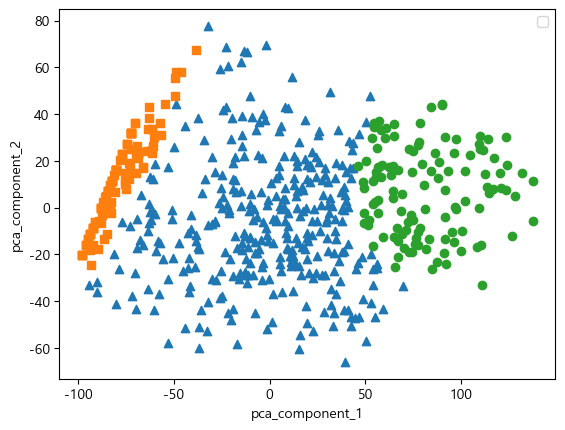

In [21]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_1']
    y_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [22]:
result = pd.concat([input_data.reset_index(),scoreDF_pca], axis=1)
result

,index,국어,영어,수학,과학,사회,역사,평균,pca_component_1,pca_component_2,gmm_cluster
0,9,93,86.0,42.0,15.0,0.0,15.0,41.833333,-1.855632,69.433282,0
1,10,93,93.0,100.0,90.0,79.0,67.0,87.000000,124.415486,18.382491,2
2,12,54,18.0,94.0,53.0,56.0,46.0,53.500000,39.113259,-18.615283,0
3,13,22,47.0,0.0,0.0,0.0,23.0,15.333333,-63.159409,1.631393,0
4,17,100,100.0,100.0,61.0,71.0,90.0,87.000000,123.440818,30.251500,2
...,...,...,...,...,...,...,...,...,...,...,...
564,2211,93,86.0,37.0,53.0,71.0,46.0,64.333333,60.497581,29.777935,2
565,2421,68,0.0,0.0,0.0,0.0,0.0,11.333333,-80.336428,15.861448,1
566,2696,100,47.0,46.0,15.0,38.0,30.0,46.000000,9.419867,42.431642,0
567,2722,0,0.0,0.0,15.0,0.0,0.0,2.500000,-94.167144,-33.082715,0


### 2-2. 결과 과목별 시각화

In [23]:
def ploting_score(df):
    f, ax = plt.subplots(3,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(), # 0번 클러스터
                color="cyan", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(), # 1번 클러스터
                color="pink", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(), # 2번 클러스터
                color="palegreen", ax = ax[0,0])
    ax[0,0].set_title('국어')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="cyan", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="pink", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="palegreen", ax = ax[0,1])
    ax[0,1].set_title('수학')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="cyan",ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="pink", ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="palegreen", ax = ax[0,2])
    ax[0,2].set_title('영어')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="cyan", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="pink", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="palegreen", ax = ax[1,0])
    ax[1,0].set_title('사회')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="cyan", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="pink", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="palegreen", ax = ax[1,1])
    ax[1,1].set_title('과학')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="cyan", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="pink", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="palegreen", ax = ax[1,2])
    ax[1,2].set_title('역사')
    ax[1,2].set_xlim([-10,110])
    
    ############ 7 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['평균'].tolist(),
                color="cyan", ax = ax[2,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['평균'].tolist(),
                color="pink", ax = ax[2,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['평균'].tolist(),
                color="palegreen", ax = ax[2,0])
    ax[2,0].set_title('평균')
    ax[2,0].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

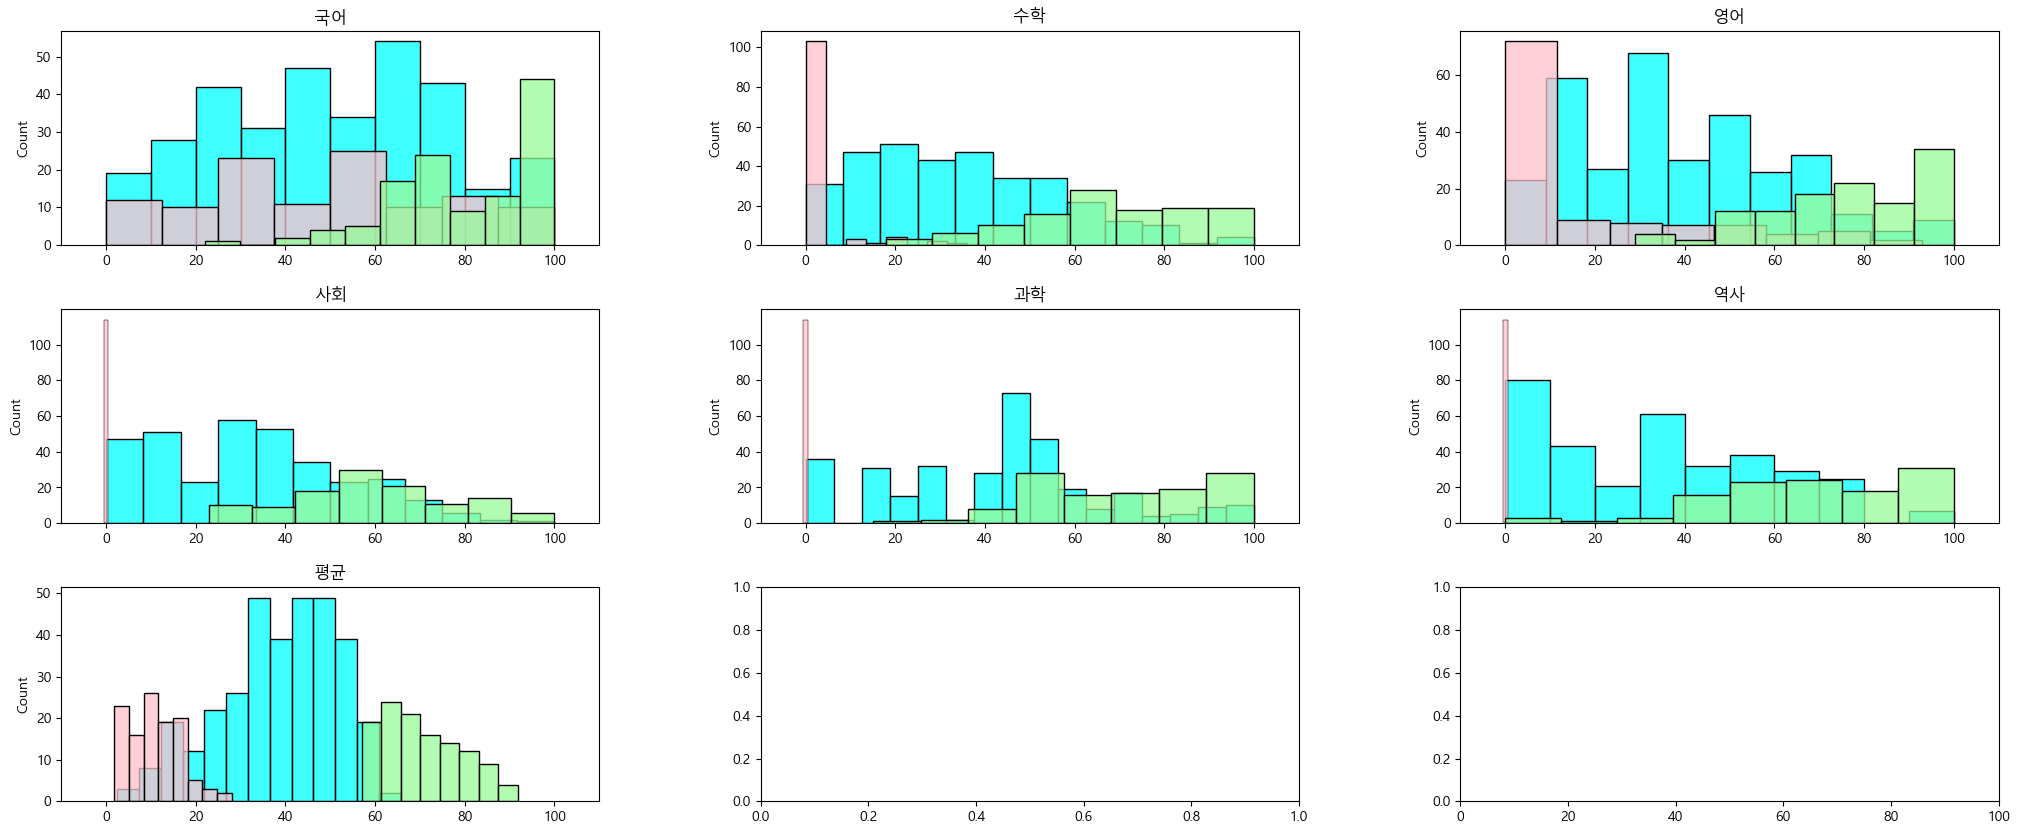

In [24]:
ploting_score(result)

### 3. 국어와 영어과목의 성적이 유사한 사용자끼리 묶이도록 K-means 활용하여 3개의 군집 만들기

In [25]:
## X : 국어 , y : 영어

X = data['평균']
y = data['국어']

In [26]:
X_array = X.index.to_numpy()
X = X_array.reshape(-1,1)
y_array = y.index.to_numpy()
y = y_array.reshape(-1,1)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

data['kmeans_cluster'] = y_pred
data

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\AppData\Local\Temp\ipykernel_20740\349708928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kmeans_cluster'] = y_pred


,국어,영어,수학,과학,사회,역사,평균,kmeans_cluster
9,93,86.0,42.0,15.0,0.0,15.0,41.833333,2
10,93,93.0,100.0,90.0,79.0,67.0,87.000000,2
12,54,18.0,94.0,53.0,56.0,46.0,53.500000,2
13,22,47.0,0.0,0.0,0.0,23.0,15.333333,2
17,100,100.0,100.0,61.0,71.0,90.0,87.000000,2
...,...,...,...,...,...,...,...,...
2211,93,86.0,37.0,53.0,71.0,46.0,64.333333,1
2421,68,0.0,0.0,0.0,0.0,0.0,11.333333,1
2696,100,47.0,46.0,15.0,38.0,30.0,46.000000,1
2722,0,0.0,0.0,15.0,0.0,0.0,2.500000,1


In [28]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
np.unique(y_pred)

array([0, 1, 2])

In [30]:
kmeans.cluster_centers_

array([[ 688.7826087 ],
       [1350.08139535],
       [ 242.02347418]])

In [31]:
# sns.scatterplot(x="평균", y="국어", hue="kmeans_cluster", data=data, palette="Set1")

### 4. Hieararchical Clustering

In [32]:
# 국어와 역사
data2 = data[['국어', '역사']]
data2

,국어,역사
9,93,15.0
10,93,67.0
12,54,46.0
13,22,23.0
17,100,90.0
...,...,...
2211,93,46.0
2421,68,0.0
2696,100,30.0
2722,0,0.0


In [35]:
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(data2,method='complete')

# plt.figure(figsize=(10,5))
# dendrogram(mergings,
#            leaf_rotation=90,
#            leaf_font_size=20,
# )
# plt.show()

In [36]:
from scipy.cluster.hierarchy import cut_tree
y_km = cut_tree(mergings, 3)

In [37]:
y_km

array([[0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
    